In [3]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df =  pd.read_csv(fichero,encoding="UTF-8")
df2 = df.dropna() #Borramos los valores nulos porque afectan a las correlaciones.
df2

,FECHAH,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA
5033,2019-08-01 00:00:00,LABORABLE,0.2,4.0,22.0,10.0,19.0,29.0,58.87,1.84,97.0,26.1,52.0,943.0,0.0,223.0,347.0,570.0
5034,2019-08-01 01:00:00,LABORABLE,0.2,2.0,15.0,10.0,21.0,18.0,63.73,1.97,117.0,24.9,55.0,943.0,0.0,173.0,231.0,404.0
5035,2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,96.0,24.0,55.0,943.0,0.0,107.0,180.0,287.0
5036,2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,106.0,23.3,55.0,943.0,0.0,80.0,129.0,209.0
5037,2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,67.0,22.9,57.0,943.0,0.0,89.0,105.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20946,2021-05-25 10:00:00,LABORABLE,0.3,18.0,38.0,9.0,18.0,66.0,47.20,1.37,79.0,18.3,46.0,953.0,0.0,587.0,658.0,1245.0
20947,2021-05-25 11:00:00,LABORABLE,0.3,17.0,37.0,7.0,16.0,62.0,60.22,1.93,62.0,19.3,42.0,953.0,0.0,582.0,651.0,1233.0
20948,2021-05-25 12:00:00,LABORABLE,0.2,11.0,31.0,7.0,16.0,49.0,73.93,1.53,12.0,21.2,38.0,952.0,0.0,573.0,743.0,1316.0
20949,2021-05-25 13:00:00,LABORABLE,0.2,8.0,26.0,5.0,11.0,39.0,86.67,1.40,28.0,22.8,35.0,952.0,0.0,631.0,730.0,1361.0


##### Correlaciones entre todos los cantaminantes durante todo el año
1) Se puede observar que hay una correlacion muy fuerte entre NO, NOx y NO2 (NO2 y el NOx (NO+NO2)) puestos que pertenecen a los óxidos de nitrógeno, debido a su composicion similar cuando cualquiera de estos se incrementa también lo haran sus homólogos.

2) También se puede ver una alta correlación entre el CO, el NO, NO2 y NOx. Una posible explicación a su relación podría ser la generación de estos gases, cuyo origen estan en la quema de combustibles fósiles relacionados a su vez con el tráfico rodado.

3) Existe una alta correlacion entre las partículas de PM2.5 (Partículas menores 2.5) y las partículas PM10 (Partículas menores de 10) la explicación para este fenemone esta en que las PM10 engloban a las PM2.5.

4) Llama la atención la antidependencia que existe entre el Ozono y el resto de contaminentes especialmente con el NOx ( la radiación solar y temperatura favorece el O3 y a su vez disminuye el NOx estas dos variables meteorológicas se anticorrelacionan normalmente con la mezcla turbulenta que favorece la difusión del NOx más concretamente el NO2).

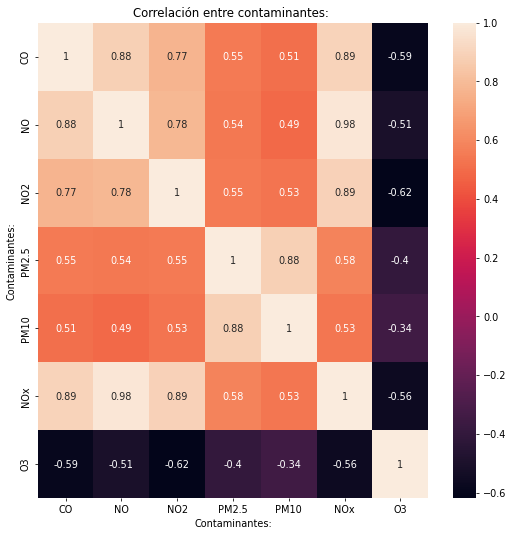

In [4]:
df_small = df2.iloc[:,2:9]

correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(9, 9),dpi=70)      
sns.heatmap(correlation_mat, annot = True)
plt.xlabel("Contaminantes:")
plt.ylabel("Contaminantes:")
plt.title("Correlación entre contaminantes: ")
plt.autoscale()

##### Correlaciones entre todos las variables meteorológicas durante todo el año
Se puede ver una considerable antidependencia entre la temperatura y la humedad realtiva. La temperatura define la presión de saturación de vapor de agua. Cualquier pequeño cambio producido en el valor de la temperatura, principalmente en altas humedades, tiene un efecto significativo en la humedad relatica, ya que la presión de saturación de vapor de agua también cambia.

Por ejemplo: 
Un pequeño cambio en la temperatura 50ºC a 51ºC originalmente 80% de humedad realtiva, reduce la humedad al 76%.

De ahí se puede sacar la explicación de la relacion inversa entre estas dos variables meteorológicas.

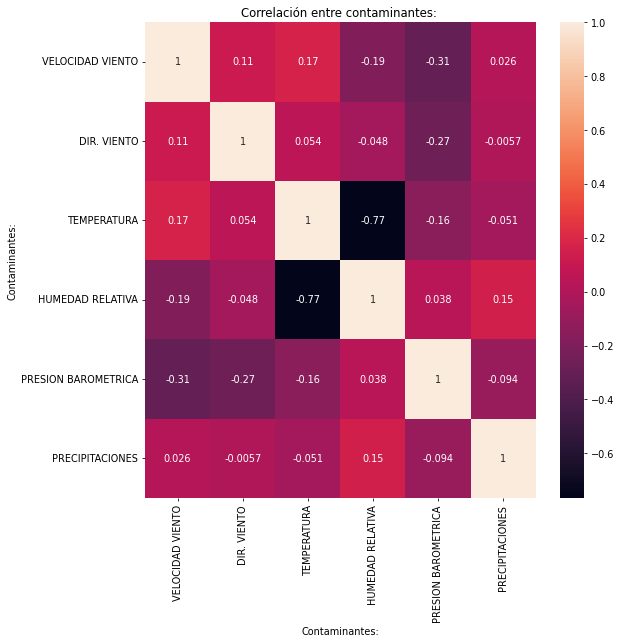

In [5]:
df_small = df2.iloc[:,9:15]

correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(9, 9),dpi=70)      
sns.heatmap(correlation_mat, annot = True)
plt.xlabel("Contaminantes:")
plt.ylabel("Contaminantes:")
plt.title("Correlación entre contaminantes: ")
plt.autoscale()

##### Correlaciones entre todos las estaciones de tráfico durante todo el año
Originalmente existia una alta correlación entre las estaciones ES53 y ES54 correspondientes a las calles de Marcelo Usera y Av de Rafaela Ibarra por lo que se opto por eliminar la estación ES54 debido a que una de las calles recibia la mayor parte del tráfico de la otra. 

(54 - Av Rafaela Ibarra.)
(53 - Av Marcelo Usera.)
(10 - Av Oporto.)

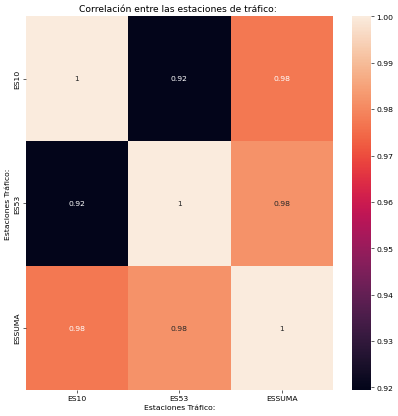

In [7]:
df_small = df2.iloc[:,15:18]
correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(9, 9),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.xlabel("Estaciones Tráfico:")
plt.ylabel("Estaciones Tráfico:")
plt.title("Correlación entre las estaciones de tráfico: ")
plt.autoscale()

##### Correlaciones entre contaminantes y meteorología durante todo el año
Se puede apreciar una ligera relacion entre la temperatura y velocidad del viento con el Ozono. A su vez una relacion inversa con la humedad relativa.

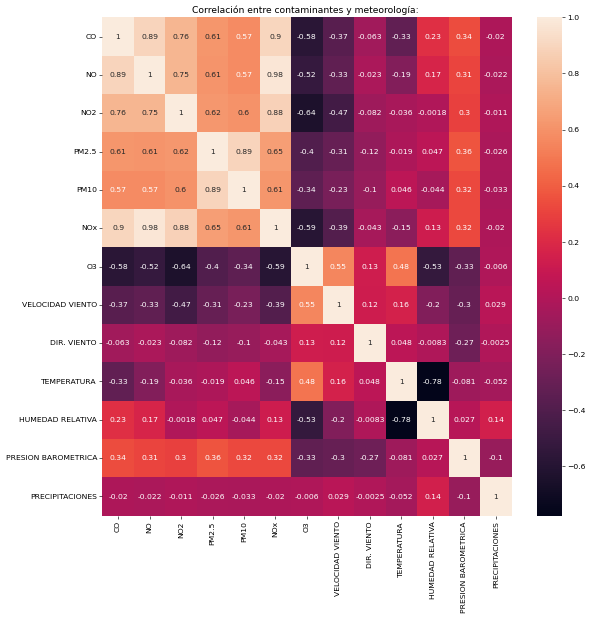

In [8]:
df_small = df2.iloc[:,2:15]
correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(12, 12),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlación entre contaminantes y meteorología: ")
plt.autoscale()
plt.savefig("ContaminantesYMeteorología.png")

##### Correlaciones entre Meteorología y tráfico.
No se pueden sacar conclusiones directas entre la meteorología con el tráfico, debido a que este mide la cantidad de coches que pasan en una hora no la densidad, congestiones, accidentes, etc.

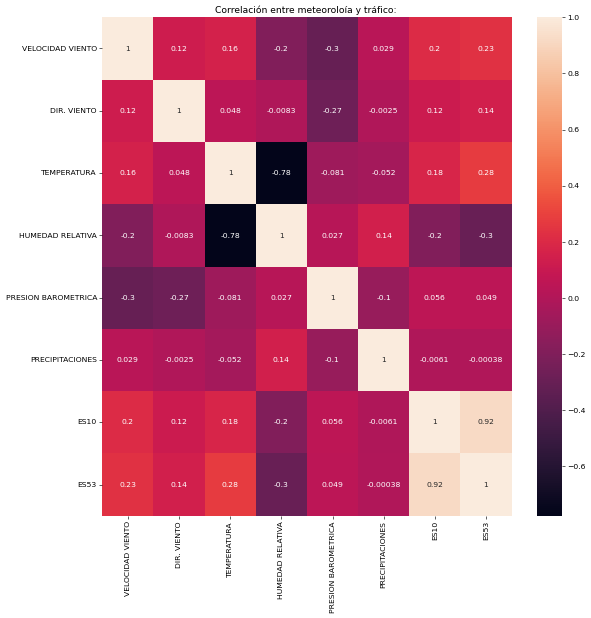

In [9]:
df_small = df2.iloc[:,9:17]
correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(12, 12),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlación entre meteoroloía y tráfico: ")
plt.autoscale()

##### Correlaciones entre contaminantes y tráfico.


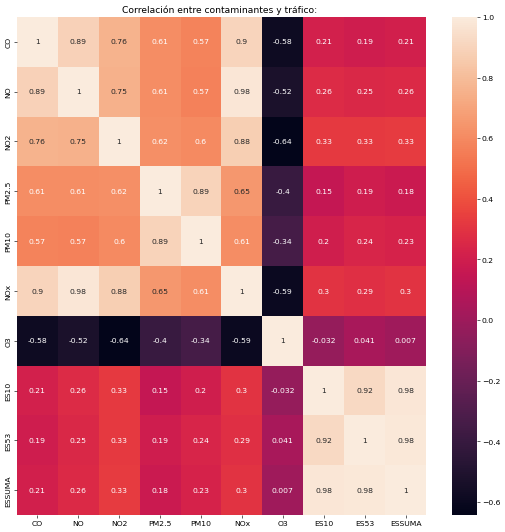

In [10]:
df_small = df2[['CO', 'NO', 'NO2', 'PM2.5', 'PM10','NOx', 'O3', 'ES10', 'ES53', 'ESSUMA']]
correlation_mat = df_small.corr()

figure, ax = plt.subplots(1,figsize=(12, 12),dpi=55)      
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlación entre contaminantes y tráfico: ")
plt.autoscale()
plt.savefig("ContaminantesYTrafico.png")